In [ ]:
import zipfile
import os
zip_path = "/content/drive/MyDrive/Fingerprints.zip"
extract_path = "/content/Fingerprints"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {os.path.abspath(extract_path)}")


Dataset extracted to: /content/Fingerprints


In [ ]:
from collections import defaultdict
from PIL import Image
import os


In [ ]:

# Dataset path
dataset_root = "/content/Fingerprints/dataset"


In [ ]:

# Prepare containers
class_counts = defaultdict(int)
image_shapes = defaultdict(int)



In [ ]:
import os
import matplotlib.pyplot as plt
dataset_dir = "/content/Fingerprints/dataset"
class_counts_dict = {}
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
for class_name in sorted(os.listdir(dataset_dir)):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        count = len([
            f for f in os.listdir(class_path)
            if f.lower().endswith(image_extensions)
        ])
        class_counts_dict[class_name] = count
total_images = sum(class_counts_dict.values())
print("✅ Total Images in Dataset:", total_images)
print("✅ Image Count per Class:")
for cls, count in class_counts_dict.items():
    print(f"   {cls}: {count}")


✅ Total Images in Dataset: 8000
✅ Image Count per Class:
   A+: 1000
   A-: 1000
   AB+: 1000
   AB-: 1000
   B+: 1000
   B-: 1000
   O+: 1000
   O-: 1000


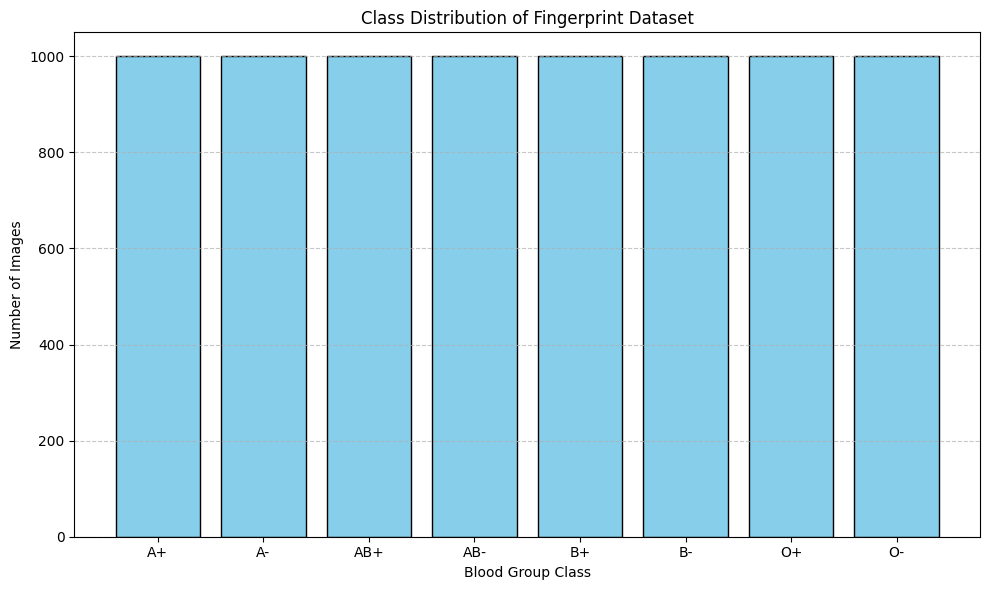

In [ ]:

# Plotting
labels = list(class_counts_dict.keys())
counts = list(class_counts_dict.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.xlabel('Blood Group Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Fingerprint Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import os
from PIL import Image
from collections import Counter
dataset_path = "/content/Fingerprints/dataset"
image_shapes = Counter()
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if not os.path.isdir(class_dir):
        continue

    for filename in os.listdir(class_dir):
        if filename.lower().endswith(image_extensions):
            img_path = os.path.join(class_dir, filename)
            try:
                with Image.open(img_path) as img:
                    image_shapes[img.size] += 1
            except Exception as e:
                print(f"❌ Could not read {img_path}: {e}")
print("\n🖼️ Image Sizes:\n")
if image_shapes:
    for size, count in image_shapes.items():
        print(f"Size {size[0]}x{size[1]}: {count} images")
else:
    print("No images found or failed to read any image.")



🖼️ Image Sizes:

Size 96x103: 7939 images
Size 241x298: 59 images
Size 103x96: 2 images


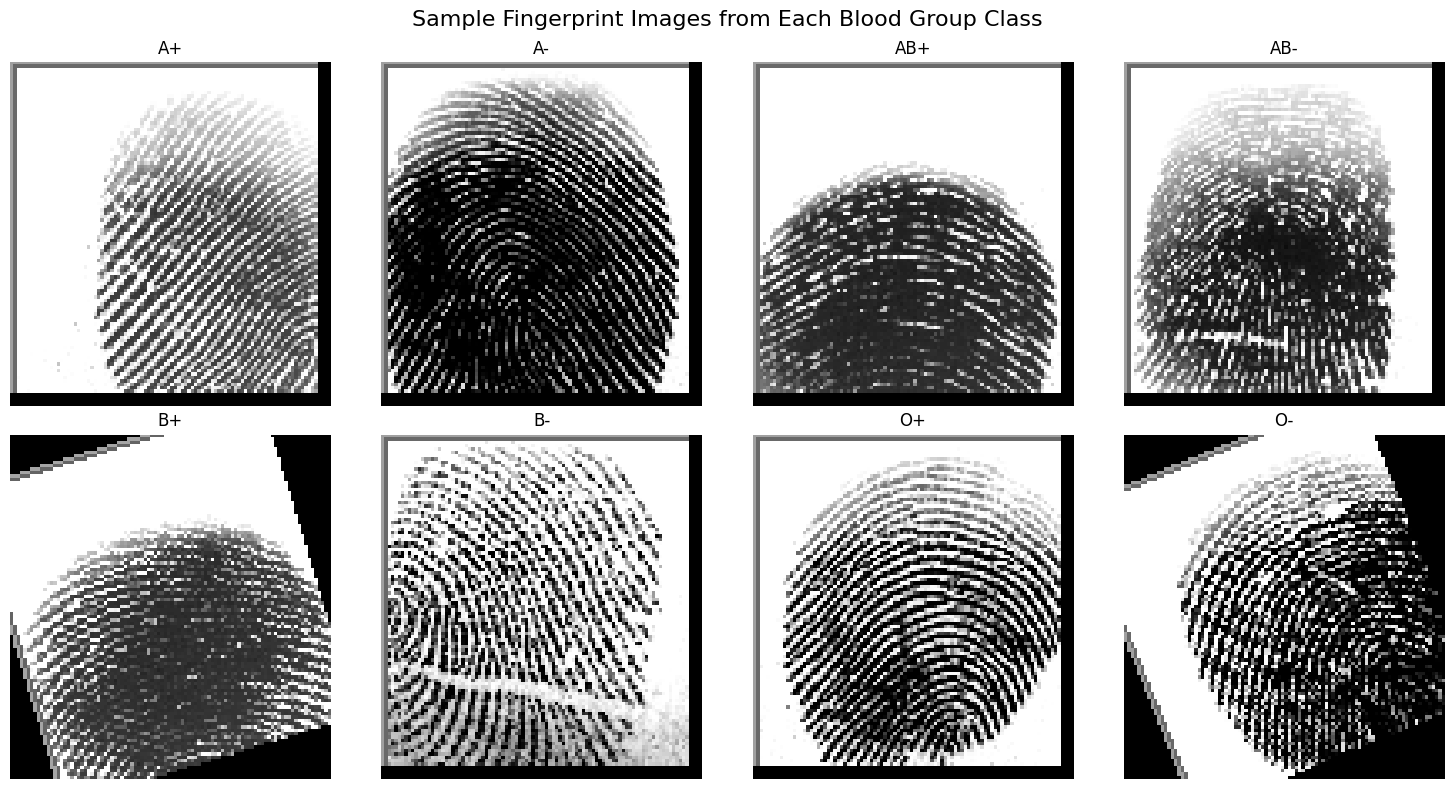

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
dataset_root = "/content/Fingerprints/dataset"
sample_images = []
labels = []

for label_folder in sorted(os.listdir(dataset_root)):
    class_path = os.path.join(dataset_root, label_folder)
    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            if file.lower().endswith(('.bmp', '.jpg', '.png', '.jpeg')):
                sample_images.append(os.path.join(class_path, file))
                labels.append(label_folder)
                break
plt.figure(figsize=(15, 8))
for i, img_path in enumerate(sample_images):
    img = Image.open(img_path).convert("L")
    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(labels[i])
    plt.axis('off')

plt.suptitle("Sample Fingerprint Images from Each Blood Group Class", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
original_dataset_dir = "/content/Fingerprints/dataset"
split_dataset_dir = "content/Fingerprints/split_dataset"
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
image_paths = []
labels = []

for class_name in os.listdir(original_dataset_dir):
    class_dir = os.path.join(original_dataset_dir, class_name)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            if file_name.lower().endswith(image_extensions):
                image_paths.append(os.path.join(class_dir, file_name))
                labels.append(class_name)

# Split dataset: 70% train, 15% val, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(
    image_paths, labels, test_size=0.15, stratify=labels, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42
)

def copy_files(image_list, labels_list, split_name):
    for img_path, label in zip(image_list, labels_list):
        dst_dir = os.path.join(split_dataset_dir, split_name, label)
        os.makedirs(dst_dir, exist_ok=True)
        shutil.copy(img_path, os.path.join(dst_dir, os.path.basename(img_path)))
copy_files(X_train, y_train, 'train')
copy_files(X_val, y_val, 'val')
copy_files(X_test, y_test, 'test')

print("✅ Dataset successfully split into train/val/test with class balance.")


✅ Dataset successfully split into train/val/test with class balance.


In [ ]:
import shutil
split_dataset_dir = "/content/content/Fingerprints/split_dataset"
output_zip_path = "content/Fingerprints_split_dataset.zip"
shutil.make_archive(base_name=output_zip_path.replace(".zip", ""),
                    format='zip',
                    root_dir=split_dataset_dir)

print(f"✅ Zipped dataset created at: {output_zip_path}")


✅ Zipped dataset created at: content/Fingerprints_split_dataset.zip


In [ ]:
import zipfile
import os
zip_path = "/content/content/Fingerprints_split_dataset.zip"
extract_path = "/content/Fingerprints_split_dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {os.path.abspath(extract_path)}")


Dataset extracted to: /content/Fingerprints_split_dataset


In [ ]:
import os
base_dir = "/content/Fingerprints_split_dataset"
splits = ['train', 'val', 'test']
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
for split in splits:
    split_dir = os.path.join(base_dir, split)
    total_images = 0
    print(f"\n📁 {split.upper()} Set:")

    for class_name in os.listdir(split_dir):
        class_dir = os.path.join(split_dir, class_name)
        if os.path.isdir(class_dir):
            num_images = len([
                f for f in os.listdir(class_dir)
                if f.lower().endswith(image_extensions)
            ])
            total_images += num_images
            print(f"  🔸 Class {class_name}: {num_images} images")

    print(f"✅ Total images in {split} set: {total_images}")



📁 TRAIN Set:
  🔸 Class AB+: 700 images
  🔸 Class A+: 700 images
  🔸 Class O+: 699 images
  🔸 Class A-: 700 images
  🔸 Class AB-: 700 images
  🔸 Class B-: 700 images
  🔸 Class O-: 700 images
  🔸 Class B+: 700 images
✅ Total images in train set: 5599

📁 VAL Set:
  🔸 Class AB+: 150 images
  🔸 Class A+: 150 images
  🔸 Class O+: 151 images
  🔸 Class A-: 150 images
  🔸 Class AB-: 150 images
  🔸 Class B-: 150 images
  🔸 Class O-: 150 images
  🔸 Class B+: 150 images
✅ Total images in val set: 1201

📁 TEST Set:
  🔸 Class AB+: 150 images
  🔸 Class A+: 150 images
  🔸 Class O+: 150 images
  🔸 Class A-: 150 images
  🔸 Class AB-: 150 images
  🔸 Class B-: 150 images
  🔸 Class O-: 150 images
  🔸 Class B+: 150 images
✅ Total images in test set: 1200


In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import CosineAnnealingLR
import matplotlib.pyplot as plt
import os

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
base_dir = "/content/Fingerprints_split_dataset"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Transform
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Datasets and loaders
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model
weights = EfficientNet_B0_Weights.DEFAULT
model = efficientnet_b0(weights=weights)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 8)
model = model.to(device)

# Loss, optimizer, scheduler
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=10)
scaler = torch.amp.GradScaler()

# Track accuracy for plotting
val_accuracies = []
test_accuracies = []

# Validation function
def validate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100 * correct / total
    print(f'Validation Accuracy: {acc:.2f}%')
    return acc

# Per-epoch test accuracy
def test_epoch(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100 * correct / total
    print(f'Test Accuracy: {acc:.2f}%')
    return acc

# Training function
def train(model, loader, val_loader, epochs=35):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            with torch.amp.autocast(device_type='cuda'):
                outputs = model(images)
                loss = criterion(outputs, labels)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            total_loss += loss.item()
        scheduler.step()
        print(f"\nEpoch [{epoch+1}/{epochs}], Loss: {total_loss/len(loader):.4f}")

        val_acc = validate(model, val_loader)
        test_acc = test_epoch(model, test_loader)

        val_accuracies.append(val_acc)
        test_accuracies.append(test_acc)

# Run training and test
train(model, train_loader, val_loader, epochs=35)



Epoch [1/35], Loss: 1.1851
Validation Accuracy: 83.01%
Test Accuracy: 83.25%

Epoch [2/35], Loss: 0.4760
Validation Accuracy: 88.09%
Test Accuracy: 87.92%

Epoch [3/35], Loss: 0.3367
Validation Accuracy: 87.84%
Test Accuracy: 88.67%

Epoch [4/35], Loss: 0.2442
Validation Accuracy: 89.09%
Test Accuracy: 91.17%

Epoch [5/35], Loss: 0.2053
Validation Accuracy: 90.09%
Test Accuracy: 90.67%

Epoch [6/35], Loss: 0.1532
Validation Accuracy: 90.51%
Test Accuracy: 91.50%

Epoch [7/35], Loss: 0.1262
Validation Accuracy: 90.67%
Test Accuracy: 91.92%

Epoch [8/35], Loss: 0.1137
Validation Accuracy: 90.42%
Test Accuracy: 92.17%

Epoch [9/35], Loss: 0.0889
Validation Accuracy: 91.51%
Test Accuracy: 91.75%

Epoch [10/35], Loss: 0.0901
Validation Accuracy: 90.76%
Test Accuracy: 91.75%

Epoch [11/35], Loss: 0.0869
Validation Accuracy: 91.42%
Test Accuracy: 91.92%

Epoch [12/35], Loss: 0.0884
Validation Accuracy: 91.01%
Test Accuracy: 91.25%

Epoch [13/35], Loss: 0.0879
Validation Accuracy: 91.26%
Test

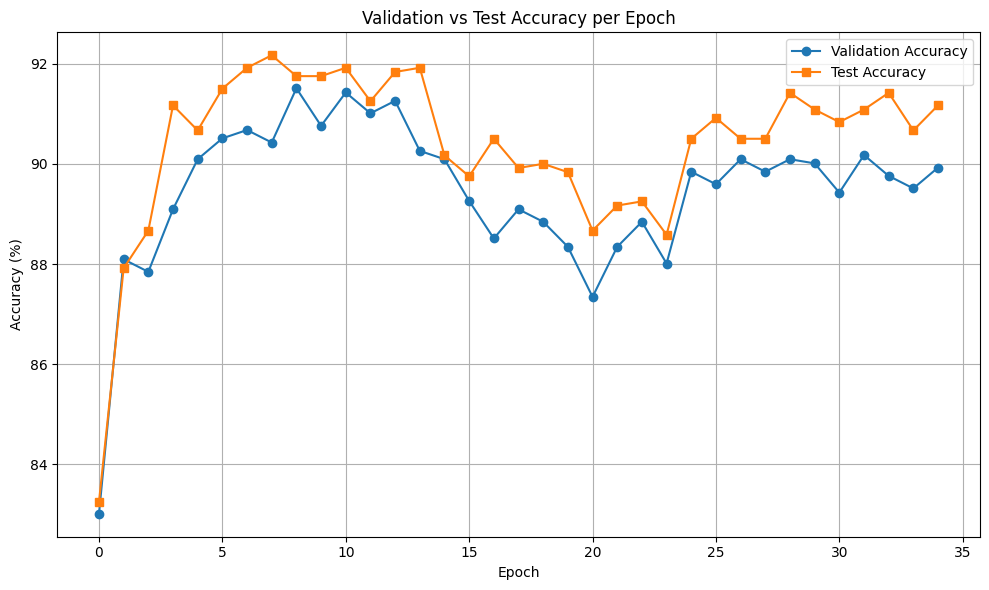

In [ ]:

# Plot validation vs test accuracy
plt.figure(figsize=(10, 6))
plt.plot(val_accuracies, label='Validation Accuracy', marker='o')
plt.plot(test_accuracies, label='Test Accuracy', marker='s')
plt.title("Validation vs Test Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np


In [ ]:
def test_and_plot_confusion(model, loader, class_names):
    print("⏳ Running test and plotting confusion matrix...")
    model.eval()
    correct, total = 0, 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = 100 * correct / total
    print(f'✅ Test Accuracy: {acc:.2f}%')

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    print("📊 Confusion matrix computed.")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    fig, ax = plt.subplots(figsize=(10, 8))
    disp.plot(cmap='Blues', ax=ax, values_format='d')
    plt.title("Confusion Matrix on Test Set")
    plt.grid(False)
    plt.tight_layout()
    plt.show()  # 👈 Forces display


⏳ Running test and plotting confusion matrix...
✅ Test Accuracy: 91.17%
📊 Confusion matrix computed.


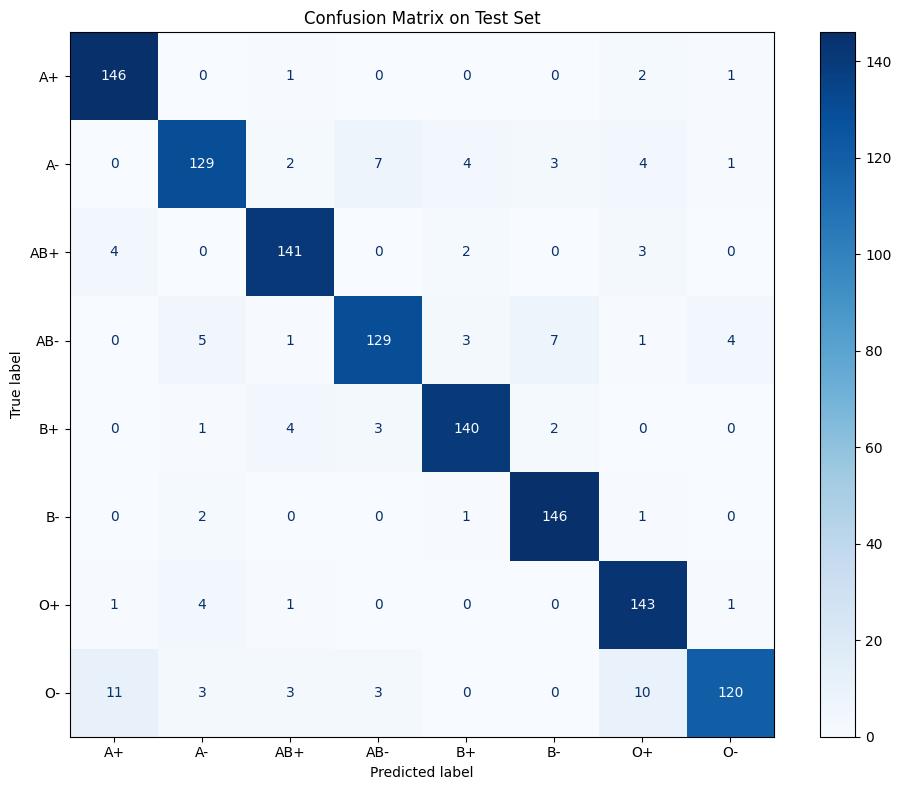

In [ ]:
class_names = train_dataset.classes
test_and_plot_confusion(model, test_loader, class_names)


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# ✅ Correct transform for EfficientNet (expects 3 channels)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to 3-channel grayscale
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# Load test dataset
test_dir = "/content/Fingerprints_split_dataset/test"
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Get class names
class_names = test_dataset.classes
print("Classes:", class_names)

# Set model to eval mode
model.eval()

# Prediction loop
for idx, (image, label) in enumerate(test_loader):
    image = image.to(device)
    label = label.to(device)

    with torch.no_grad():
        output = model(image)
        _, pred = torch.max(output, 1)

    actual_label = class_names[label.item()]
    predicted_label = class_names[pred.item()]

    print(f"[{idx+1}] Actual: {actual_label}, Predicted: {predicted_label}")


Classes: ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']
[1] Actual: A+, Predicted: A+
[2] Actual: A+, Predicted: A+
[3] Actual: A+, Predicted: A+
[4] Actual: A+, Predicted: A+
[5] Actual: A+, Predicted: A+
[6] Actual: A+, Predicted: A+
[7] Actual: A+, Predicted: A+
[8] Actual: A+, Predicted: A+
[9] Actual: A+, Predicted: A+
[10] Actual: A+, Predicted: A+
[11] Actual: A+, Predicted: A+
[12] Actual: A+, Predicted: A+
[13] Actual: A+, Predicted: A+
[14] Actual: A+, Predicted: A+
[15] Actual: A+, Predicted: A+
[16] Actual: A+, Predicted: A+
[17] Actual: A+, Predicted: A+
[18] Actual: A+, Predicted: A+
[19] Actual: A+, Predicted: A+
[20] Actual: A+, Predicted: A+
[21] Actual: A+, Predicted: A+
[22] Actual: A+, Predicted: O+
[23] Actual: A+, Predicted: A+
[24] Actual: A+, Predicted: A+
[25] Actual: A+, Predicted: A+
[26] Actual: A+, Predicted: A+
[27] Actual: A+, Predicted: A+
[28] Actual: A+, Predicted: A+
[29] Actual: A+, Predicted: A+
[30] Actual: A+, Predicted: A+
[31] Actual: A+, Pr

In [ ]:
correct_count = 0
wrong_count = 0

model.eval()
with torch.no_grad():
    for idx, (image, label) in enumerate(test_loader):
        image = image.to(device)
        label = label.to(device)

        output = model(image)
        _, pred = torch.max(output, 1)

        if pred.item() == label.item():  # ✅ ensure tensor to int comparison
            correct_count += 1
        else:
            wrong_count += 1

total_images = correct_count + wrong_count
accuracy = (correct_count / total_images) * 100

print(f"Total Test Images: {total_images}")
print(f"Correct Predictions: {correct_count}")
print(f"Wrong Predictions: {wrong_count}")
print(f"Test Accuracy: {accuracy:.2f}%")


Total Test Images: 1200
Correct Predictions: 1094
Wrong Predictions: 106
Test Accuracy: 91.17%


In [ ]:
torch.save(model.state_dict(), "efficientnet_bloodgroup_weights.pt")


In [ ]:
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
import torch.nn as nn

# Recreate the model
model = efficientnet_b0(weights=None)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 8)
model.load_state_dict(torch.load("efficientnet_bloodgroup_weights.pt"))
model = model.to(device)
model.eval()


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat